# Week 3: Bivariate Distributions

Over 1,200 bull riders from around the world are members of the Professional Bull Riders (PBR). They compete in more than 300 PBR-affiliated bull riding events per year. In the American tradition, the rider must stay atop the bucking bull for a full eight seconds. This data set includes information about the top-ranked bull riders for 2013.  Rankings are based on a system which awards points for qualified rides at events throughout the season. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bull = pd.read_csv("BullRiders.csv")

In [27]:
bull

,Unnamed: 0,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
0,1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
1,2,Matt Triplett,2,USA,1991,67,160,4,28,86,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
2,3,J.B. Mauney,3,USA,1987,70,140,10,22,63,...,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
3,4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
4,5,Nathan Schaper,5,USA,1990,73,160,6,15,41,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
5,6,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,81,...,87,53,10608.25,4,0.61,1,10,14,559.50,208724.52
6,7,Guilherme Marchi,7,BRA,1982,70,180,16,28,90,...,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
7,8,Silvano Alves,8,BRA,1987,67,150,7,28,92,...,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
8,9,Reese Cates,9,USA,1989,68,135,9,12,30,...,10,3,428.50,53,0.30,0,0,1,0.00,27987.21
9,10,J.W. Harris,10,USA,1986,70,160,10,14,37,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00


## Pre Lab

### Primary Research Question

For the 2013 season, Is there a linear relationship between how often a rider placed in the Top 10 and the number of times he stayed on his bull for a full 8 seconds?

How many observations are in the dataset?

In [3]:
bull.shape

(58, 45)

How many of the first 10 riders in the dataset have been pro for 10 years or more?

In [4]:
bull_10 = bull[0:10]
bull_10[bull_10["YearsPro"] >= 10]

,Unnamed: 0,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
2,3,J.B. Mauney,3,USA,1987,70,140,10,22,63,...,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
6,7,Guilherme Marchi,7,BRA,1982,70,180,16,28,90,...,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
9,10,J.W. Harris,10,USA,1986,70,160,10,14,37,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00


Of the top 15 riders so far in 2015, how many rides were completed by the rider with the fewest buck-outs in 2014?

In [5]:
bull.sort_values('Rank15')
bull_top15 = bull[0:15]
bull_min = bull_top15.loc[bull_top15["BuckOuts14"].idxmin()]
bull_min["Rides14"]

0

1. Which variable tells us how many times the rider has placed in the Top 10 at the end of the 2013 season? The variable name in the dataset is:
Top10_13
2. What type of variable is this?
Numerical
3. Which variable tells us the number of times a rider stayed on his bull for the full 8 seconds in 2013? The variable name in the dataset is:
Rides13
4. What type of variable is this?
Numerical
5. We will use correlation to answer this lab question. Why?
We want to explore a linear relationship between two quantitative variables.
6. We should generate a scatterplot of these two variables before we continue our analysis. Why?
We want to confirm that the relationship is linear.

In [6]:
from __future__ import division
import math
import sys
 
def fivenum(array):
    n = len(array)
    if n == 0:
        print("you entered an empty array.")
        sys.exit()
    x = sorted(array)
 
    n4 = math.floor((n+3.0)/2.0)/2.0
    d = [1, n4, (n+1)/2, n+1-n4, n]
    sum_array = []
 
    for e in range(5):
        floor = int(math.floor(d[e] - 1))
        ceil = int(math.ceil(d[e] - 1))
        sum_array.append(0.5 * (x[floor] + x[ceil]))
 
    return sum_array

def visualize_variable(s):
    plt.hist(s, color = 'blue')
    plt.show()
    print "Five Numbers: ", fivenum(s)
    print "Mean: ", s.mean()
    print "Standard Deviation: ", s.std()
    print "Median: ", s.median()

Create a subset of the data which contains only those riders that have participated in at least one event in 2013.

In [7]:
bull_13 = bull[bull["Events13"] > 0]

#### Visualizing Rides13

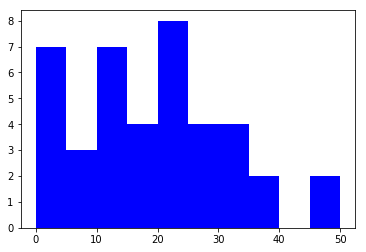

Five Numbers:  [0.0, 11.0, 19.0, 25.0, 50.0]
Mean:  18.7317073171
Standard Deviation:  12.7318977184
Median:  19.0


In [8]:
visualize_variable(bull_13["Rides13"])

#### Visualizing Top10_13

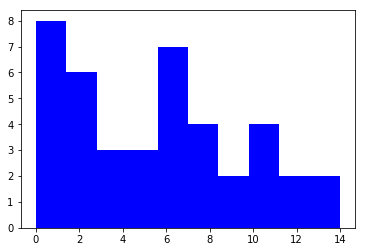

Five Numbers:  [0.0, 2.0, 6.0, 8.0, 14.0]
Mean:  5.39024390244
Standard Deviation:  4.03657062852
Median:  6.0


In [9]:
visualize_variable(bull_13["Top10_13"])

Create a scatterplot of the two variables of interest. (Top10_13, Rides13)

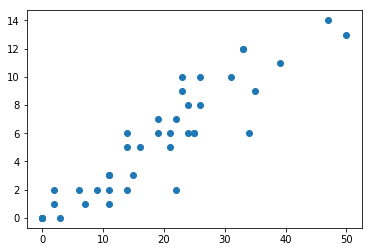

In [10]:
plt.scatter(bull_13["Rides13"], bull_13["Top10_13"])
plt.show()

Check to see that the relationship is linear.  Plot a line of best fit as a guide.

In [20]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

def scatter(X, Y):
    # solution
    a, b = best_fit(X, Y)

    # plot points and fit line
    plt.scatter(X, Y)
    yfit = [a + b * xi for xi in X]
    plt.plot(X, yfit)
    plt.show()

best fit line:
y = -0.05 + 0.29x


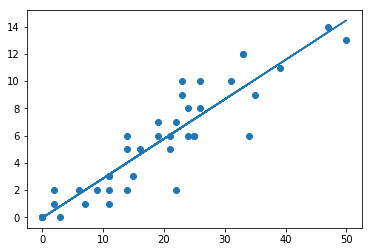

In [21]:
scatter(bull_13["Rides13"], bull_13["Top10_13"])

If the relationship is linear, calculate the correlation coefficient.

In [12]:
bull_13["Rides13"].corr(bull_13["Top10_13"])

0.91660595297804104

In [13]:
new_bull_13 = bull_13[['Rides13', 'Top10_13']].copy()
new_bull_13.corr()

,Rides13,Top10_13
Rides13,1.000000,0.916606
Top10_13,0.916606,1.000000


#### Carefully examine any outliers.

On the scatterplot, we see a data point with a fairly large residual. This rider had 22 rides, but he only placed in the Top 10 two times. This rider's data point falls below the line of best fit. If his data followed the line of best fit, he should have placed in the Top 10 about 6 times.

After looking at the data for this rider, can you explain why he has placed in the Top 10 so few times?

In [14]:
only_bull_13 = bull_13[['Unnamed: 0', 'Rider', 'Rank15', 'Country', 'YearBorn', 
                        'Height','Weight', 'YearsPro', 'Events13', u'BuckOuts13',
                        u'Rides13', u'CupPoints13', 'Rank13', 'RidePer13', 
                        'RidesPer_45bull_13', 'Rides90pts_13', 'Wins13', 'Top5_13', 
                        'Top10_13', 'FinalPoints13', 'Earnings13']].copy()
only_bull_13[(only_bull_13["Rides13"] == 22) & (only_bull_13["Top10_13"] == 2)]

,Unnamed: 0,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,...,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
4,5,Nathan Schaper,5,USA,1990,73,160,6,24,66,...,4304.41,25,0.3333,0.0,0,0,2,2,0.0,58577.22


His ride percentage was only about 33%, which wasn't high enough to place him in the Top 10.

Interpret what the correlation says about the linear relationship between these variables.

There is a strong positive linear relationship between the number of 8-second rides a bull rider completed and the total number of times he made it in the Top 10 after the 2013 season, (r = 0.917).  The average number of rides for these bull riders was around 19.  There were no significant outliers.  One rider appeared to have placed in the top-10 rankings only twice, despite an above-average number of rides.  Upon closer inspection, we could see that he did not have a very high ride percentage which might account for his few appearances in the Top 10.

## Lab

### Primary Research Question
In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?

Create a dataset which contains riders that participated in at least one event in 2012. Call the dataset new_bull12.

In [15]:
bull_12 = bull[bull["Events12"] > 0]

Make a histogram to visualize the distribution of Earnings for 2012.  Generate the appropriate descriptive statistics for this distribution.

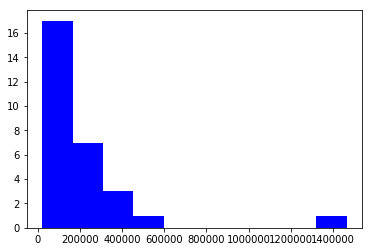

Five Numbers:  [21343.279999999999, 66814.330000000002, 147952.34, 239935.66, 1464475.6100000001]
Mean:  201370.848276
Standard Deviation:  267178.129176
Median:  147952.34


In [16]:
visualize_variable(bull_12["Earnings12"])

Make a correlation matrix for Earnings12, RidePer12 and CupPoints12.

In [19]:
new_bull_12 = bull_12[["Earnings12", "RidePer12", "CupPoints12"]].copy()
new_bull_12.corr()

,Earnings12,RidePer12,CupPoints12
Earnings12,1.000000,0.593411,0.656936
RidePer12,0.593411,1.000000,0.918337
CupPoints12,0.656936,0.918337,1.000000


Plot a scatterplot for Earnings12 with each variable of interest.  Put Earnings12 on the y-axis.  Check for outliers.

best fit line:
y = 0.34 + 0.00x


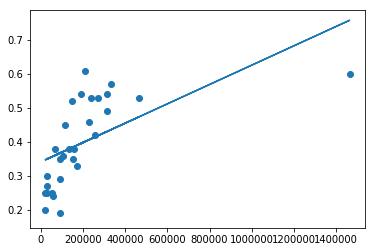

In [22]:
scatter(bull_12["Earnings12"], bull_12["RidePer12"])

best fit line:
y = 3646.52 + 0.01x


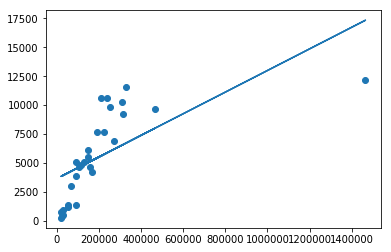

In [23]:
scatter(bull_12["Earnings12"], bull_12["CupPoints12"])

#### Outliers

In [25]:
bull_12_outlier = bull_12[bull_12["Earnings12"] < 1000000]
new_bull_12_outlier = bull_12_outlier[["Earnings12", "RidePer12", "CupPoints12"]].copy()
new_bull_12_outlier.corr()

,Earnings12,RidePer12,CupPoints12
Earnings12,1.000000,0.803557,0.892921
RidePer12,0.803557,1.000000,0.909788
CupPoints12,0.892921,0.909788,1.000000


### Conclution

An initial examination of the relationships between Ride Percentage (RidePer) and Earnings, and Cup Points (CupPoints) and Earnings showed that Cup Points had the stronger relationship to Earnings. Ride Percentage and Earnings showed a correlation value of 0.593 while Cup Points and Earnings had a correlation value of 0.657. Visual examination showed an outlier in both relationships—a rider who has earned over 1 million dollars. Removal of this increased the initial relationship: Ride Percentage and Earnings now had a correlation value of 0.804 and Cup Points and Earnings had a correlation value of 0.893.  Cup Points still had the higher relationship to Earnings. Visual examination showed a good linear relationship for both Ride Percentage and Cup Points, indicating the correct use of the correlation coefficient.